# 1.4b Introduction to TensorFlow (model as tensor)

#### The first steps are identical to [L1-4a__TensorFlow_intro_single.ipynb](https://github.com/the-deep-learners/TensorFlow-LiveLessons/blob/master/notebooks/L1-4a__TensorFlow_intro_single.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.]
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.]

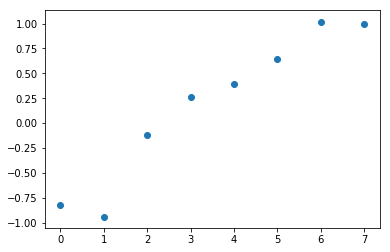

In [3]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)

In [4]:
m_initial = -0.5
b_initial = 1.0

In [5]:
m = tf.Variable(m_initial)
b = tf.Variable(b_initial)

#### Define the error as a tensor, which is more elegant than a *for* loop and, with TensorFlow, allows distributed computing

In [6]:
ys_model = m*xs+b
total_error = tf.reduce_sum((ys-ys_model)**2) # minimize the sum of squared-error across all predicted values

#### The remaining steps are also identical to [L1-4a__TensorFlow_intro_single.ipynb](https://github.com/the-deep-learners/TensorFlow-LiveLessons/blob/master/notebooks/L1-4a__TensorFlow_intro_single.ipynb)

In [7]:
optimizer_operation = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(total_error) 

In [8]:
initializer_operation = tf.global_variables_initializer()

In [9]:
with tf.Session() as session:

    session.run(initializer_operation) 
    
    _EPOCHS = 10000 
    for iteration in range(_EPOCHS):
        session.run(optimizer_operation) 
    
    slope, intercept = session.run((m, b)) 
    print('Slope:', slope, 'Intercept:', intercept)

Slope: 0.297022 Intercept: -0.860827


In [10]:
y_hat = intercept + slope*np.array(xs)

In [11]:
pd.DataFrame(list(zip(ys, y_hat)), columns=['y', 'y_hat'])

,y,y_hat
0,-0.82,-0.860827
1,-0.94,-0.563804
2,-0.12,-0.266782
3,0.26,0.030241
4,0.39,0.327263
5,0.64,0.624285
6,1.02,0.921308
7,1.00,1.218330


(-0.3598566308243728, 7.359856630824372)

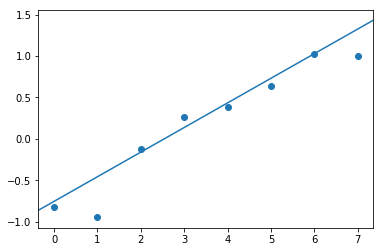

In [12]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)

x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max])
ax.set_xlim([x_min, x_max])